In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 49

In [2]:
import dezero.datasets as dsets

#train_set = dsets.get_spiral(train=True)
train_set = dsets.Spiral(train=True)
print(train_set[10])
print(len(train_set))

(array([-0.12995958, -0.00324155], dtype=float32), 1)
300


In [3]:
from dezero import transforms

f = transforms.Normalize(mean=0.0, std=2.0)
train_set = dsets.Spiral(transform=f)
print(train_set[10])
print(len(train_set))

(array([-0.06497979, -0.00162078], dtype=float32), 1)
300


# Step 50

In [4]:
import dezero.datasets as dsets
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = dsets.Spiral(train=True)
test_set = dsets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape)
        print(x)
        print(t)
        break

    # 에포크 끝에서 test데이터 꺼냄
    for x, t in test_loader:
        print(x.shape, t.shape)
        print(x)
        print(t)
        break

(10, 2) (10,)
[[ 0.662295    0.3070266 ]
 [-0.4507611  -0.3649855 ]
 [-0.29891637 -0.75282735]
 [ 0.1297094  -0.15223493]
 [-0.24501143  0.04969303]
 [ 0.43561164 -0.45512912]
 [-0.          0.        ]
 [ 0.5703474   0.5609847 ]
 [ 0.05997716 -0.00165524]
 [-0.05060399 -0.427012  ]]
[1 2 0 2 1 0 0 1 2 2]
(10, 2) (10,)
[[ 0.13246453  0.13620993]
 [-0.31427157  0.24745378]
 [-0.4163083  -0.7525207 ]
 [-0.23108277  0.06481325]
 [-0.0013787  -0.41999775]
 [-0.10935841 -0.3951465 ]
 [ 0.92357093  0.17497644]
 [-0.59439325  0.64891964]
 [-0.7590094   0.0387906 ]
 [ 0.43388283 -0.36965618]]
[0 1 0 1 2 2 1 2 2 0]


In [6]:
import numpy as np
import dezero.functions as F

y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1,2,0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


training spiral dataset with DataLoader, accuracy

In [13]:
import dezero
from dezero.models import MLP
from dezero import optimizers

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dsets.Spiral(train=True)
test_set = dsets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

save_loss_train = []
save_loss_test = []
save_acc_train = []
save_acc_test = []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:   # 훈련용 미니배치 데이터
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    avg_loss = sum_loss / len(train_set)
    avg_acc = sum_acc / len(train_set)

    save_loss_train.append(avg_loss)
    save_acc_train.append(avg_acc)

    if (epoch+1) % 30 == 0:
        print(f'epoch: {epoch+1}')
        print(f'train loss: {avg_loss:.4f}, accuracy: {avg_acc:.4f}')

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():  # 테스트는 기울기 불필요
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)

            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    
    avg_loss = sum_loss / len(train_set)
    avg_acc = sum_acc / len(train_set)

    save_loss_test.append(avg_loss)
    save_acc_test.append(avg_acc)

    if (epoch+1) % 30 == 0:
        print(f'test loss: {avg_loss:.4f}, accuracy: {avg_acc:.4f}')
        print()

epoch: 30
train loss: 0.7273, accuracy: 0.5600
test loss: 0.7382, accuracy: 0.5433

epoch: 60
train loss: 0.6122, accuracy: 0.6633
test loss: 0.6169, accuracy: 0.6400

epoch: 90
train loss: 0.3772, accuracy: 0.8333
test loss: 0.3831, accuracy: 0.8300

epoch: 120
train loss: 0.2361, accuracy: 0.9200
test loss: 0.2573, accuracy: 0.9200

epoch: 150
train loss: 0.1890, accuracy: 0.9233
test loss: 0.2152, accuracy: 0.9067

epoch: 180
train loss: 0.1539, accuracy: 0.9500
test loss: 0.1814, accuracy: 0.9367

epoch: 210
train loss: 0.1382, accuracy: 0.9533
test loss: 0.1676, accuracy: 0.9467

epoch: 240
train loss: 0.1251, accuracy: 0.9500
test loss: 0.1583, accuracy: 0.9433

epoch: 270
train loss: 0.1191, accuracy: 0.9567
test loss: 0.1507, accuracy: 0.9533

epoch: 300
train loss: 0.1082, accuracy: 0.9667
test loss: 0.1458, accuracy: 0.9600



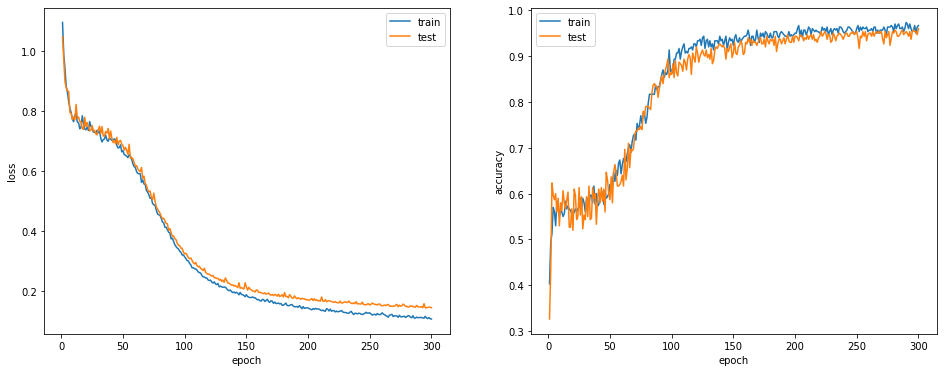

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(1, 301), save_loss_train, label='train')
plt.plot(np.arange(1, 301), save_loss_test, label='test')
plt.legend()

plt.subplot(122)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(np.arange(1, 301), save_acc_train, label='train')
plt.plot(np.arange(1, 301), save_acc_test, label='test')
plt.legend()

plt.show()